Para este punto es necesario contar con el raster discretizado obtenido del paso 2

In [2]:
import rasterio as rio
from rasterio.mask import mask
import shapefile
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import mapping
import os
import fiona

In [3]:
carpet = 'ACCESS-ESM1-5_ssp126_2021-2040'
files_names = ['AMT.tif', 'MDR.tif', 'ISO.tif', 'TS.tif', 'MTWM.tif', 'MTCM.tif', '(BIO5-BIO6).tif', 'MTWettQ.tif', 'MDQ.tif', 'MTWarmQ.tif', 'MTCQ.tif', 'AP.tif', 'PWM.tif', 'PDM.tif', 'PSCV.tif', 'PWettQ.tif', 'PDQ.tif', 'PWarmQ.tif', 'PCQ.tif']

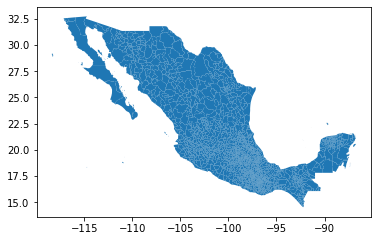

In [5]:
dr = os.path.join('muni_2016gw', 'muni_2016gw.shp')
mexico_shapefile = gpd.read_file(dr)
mexico_shapefile.plot()
plt.show()

In [6]:
with fiona.open(dr, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]
    cves = [feature['properties']["CVE_ENT"] + feature['properties']["CVE_MUN"] for feature in shapefile]
    
    print(shapefile[0]['properties']["CVE_ENT"]+shapefile[0]['properties']["CVE_MUN"])
    print("\n --------------- \n")
    print(cves[0])

01002

 --------------- 

01002


In [7]:
def process_carpet_file(carpet, file):
    file_dict={} #En este diccionario se guarda el resultado, la llave es el nombre del archivo
    no_percentiles = 20
    N = len(shapes)
    cells_bins = {}
    counts_d = {i:0 for i in range(1, no_percentiles + 2)}

    # se obtiene el raster y se inicia el proceso de conteo
    with rio.open(os.path.join(carpet, file)) as src:
        for i in range(N):
            feature = shapes[i]
            out_image, out_transform = rio.mask.mask(src, [feature], crop=True)
            bins, counts = np.unique(out_image, return_counts=True)
            for j in range(len(bins)):
                if not np.isnan(bins[j]):
                    counts_d[bins[j]] += counts[j]
            if cves[i] in cells_bins.keys():
                cells_bins[cves[i]] += [b for b in bins if b != no_percentiles + 1]
                cells_bins[cves[i]] = list(set(cells_bins[cves[i]]))
            else:
                cells_bins[cves[i]] = [b for b in bins if b != no_percentiles + 1]
            
    return (cells_bins, counts_d)


In [8]:
def clean_cells_bins(cells_bins):    
    cells_bins = [n for n in cells_bins if not np.isnan(n)]
    cells_bins = [int(n) for n in cells_bins]
    return cells_bins

In [9]:
cells_bins_dict = {}
counts_d_dict={}
for file in files_names:
    cells_bins_dict[file[:-4]] ,counts_d_dict[file[:-4]] = process_carpet_file(carpet, file)

In [14]:
counts_d_dict['AMT']

{1: 41976,
 2: 83251,
 3: 58711,
 4: 48337,
 5: 53604,
 6: 87348,
 7: 152078,
 8: 145549,
 9: 137715,
 10: 126214,
 11: 94624,
 12: 109940,
 13: 137980,
 14: 148786,
 15: 120191,
 16: 148956,
 17: 126741,
 18: 108208,
 19: 104332,
 20: 455904,
 21: 25161}

In [11]:
for key in cells_bins_dict:
    for mun in cells_bins_dict[key]:
        cells_bins_dict[key][mun] = clean_cells_bins(cells_bins_dict[key][mun])

In [22]:
def bins_to_gridid(cells_bins):
    d_bins_gridid = {i:[] for i in range(1, 21)}
    for i in range(1, 21):
        for cell in cells_bins.keys():
            if i in cells_bins[cell]:
                d_bins_gridid[i].append(cell)
                
    return d_bins_gridid

In [26]:
d_bins_grid_dict={}
for key in cells_bins_dict:
    d_bins_grid_dict[key] = bins_to_gridid(cells_bins_dict[key])

In [28]:
d_bins_grid_dict['TS']

{1: ['06010',
  '06005',
  '06002',
  '06003',
  '06006',
  '06009',
  '07087',
  '07097',
  '07108',
  '07017',
  '07046',
  '07051',
  '07010',
  '07053',
  '07069',
  '07011',
  '07008',
  '07070',
  '07054',
  '07102',
  '07117',
  '07057',
  '07006',
  '07032',
  '07020',
  '07105',
  '07089',
  '07001',
  '07009',
  '07080',
  '07107',
  '07055',
  '07030',
  '07015',
  '07003',
  '07103',
  '07071',
  '07034',
  '07035',
  '07036',
  '07037',
  '07040',
  '09012',
  '12021',
  '12030',
  '12015',
  '12003',
  '12072',
  '12022',
  '12074',
  '12073',
  '12040',
  '12076',
  '12066',
  '12047',
  '12052',
  '12069',
  '12041',
  '12048',
  '12045',
  '12068',
  '12008',
  '12002',
  '12062',
  '12019',
  '12071',
  '12043',
  '12054',
  '12057',
  '12063',
  '12070',
  '12028',
  '12080',
  '12024',
  '12012',
  '12004',
  '12029',
  '12032',
  '12034',
  '12075',
  '12051',
  '12009',
  '12016',
  '12010',
  '12042',
  '12061',
  '12013',
  '12060',
  '12077',
  '12039',
  '1203